In [72]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [73]:
directory = "./TEST_METRIC_LOG/BERT_0607_each2"
names = ["bert-base-cased", "bert-base-uncased", "matbert-base-cased", "matbert-base-uncased","MaterialsBERT","matscibert", "scibert_scivocab_cased", "scibert_scivocab_uncased" ]
logfiles = os.listdir(directory)
dic = {}
for name in names:
  for file in logfiles:
    if "NAME"+ name in file and "Random_State42" not in file:
      if name not in dic.keys():
        dic[name] = [file]
      else:
        dic[name].append(file)

In [74]:
dic

{'bert-base-cased': ['[BERT]BERTNAMEbert-base-cased_processID24_06_07_07_23_46_1_Random_State11_lr2e-05_epoch21_threshold0.5_MAX_LEN128.txt',
  '[BERT]BERTNAMEbert-base-cased_processID24_06_07_07_23_46_1_Random_State22_lr2e-05_epoch31_threshold0.5_MAX_LEN128.txt',
  '[BERT]BERTNAMEbert-base-cased_processID24_06_07_07_23_46_1_Random_State33_lr2e-05_epoch38_threshold0.5_MAX_LEN128.txt',
  '[BERT]BERTNAMEbert-base-cased_processID24_06_07_07_23_46_1_Random_State44_lr2e-05_epoch21_threshold0.5_MAX_LEN128.txt',
  '[BERT]BERTNAMEbert-base-cased_processID24_06_07_07_23_46_1_Random_State55_lr2e-05_epoch27_threshold0.5_MAX_LEN128.txt',
  '[BERT]BERTNAMEbert-base-cased_processID24_06_07_12_32_27_1_Random_State12_lr2e-05_epoch24_threshold0.5_MAX_LEN128.txt',
  '[BERT]BERTNAMEbert-base-cased_processID24_06_07_12_32_27_1_Random_State24_lr2e-05_epoch22_threshold0.5_MAX_LEN128.txt',
  '[BERT]BERTNAMEbert-base-cased_processID24_06_07_12_32_27_1_Random_State36_lr2e-05_epoch26_threshold0.5_MAX_LEN128.txt

In [75]:
def get_value(row):
  return float(row.split(": ")[1])
def get_metric_target(row):
  splited = row.split(": ")[0].split("(")
  metric = splited[0][4:].strip()
  target = splited[1].replace(")" , "")
  return metric, target

In [76]:
scores_dic = {}

for BERT, file_list in dic.items():
  
  for file in file_list:
    path = directory + "/" + file
    with open(path, 'r') as f:
      txt = f.read()
    scores = txt.split("\n")[:-1]
    for row in scores:
      value = get_value(row)
      metric, target = get_metric_target(row)
      if target not in scores_dic.keys():
        scores_dic[target] = {}
      if metric not in scores_dic[target].keys():
        scores_dic[target][metric] = {}
      if  BERT not in  scores_dic[target][metric].keys():
        scores_dic[target][metric][BERT] = []
      scores_dic[target][metric][BERT].append(value)
    

In [77]:
scores_dic["AVG"].keys()

KeyError: 'AVG'

In [78]:
scores_dic

{'Nanoparticle': {'Precision': {'bert-base-cased': [0.7704286454286454,
    0.7792397660818713,
    0.7828042328042328,
    0.780952380952381,
    0.7243507445713327,
    0.7569843550446999,
    0.7444444444444445,
    0.7388888888888889,
    0.7498714520773344,
    0.6727737241850145,
    0.7363238613238613,
    0.738260582010582,
    0.7425925925925926,
    0.7934565434565436],
   'bert-base-uncased': [0.7904883107088989,
    0.7634920634920634,
    0.7660094535094535,
    0.7817460317460316,
    0.7934565434565436],
   'matbert-base-cased': [0.755948255948256,
    0.7783389450056116,
    0.7733860342555995,
    0.7444444444444445,
    0.7528104575163398,
    0.7696969696969697,
    0.7432359307359307,
    0.7827020202020202,
    0.7764423076923078,
    0.7211446360153256,
    0.7742929292929293,
    0.7892473118279569,
    0.7931995540691194,
    0.8181818181818182,
    0.8143399810066477],
   'matbert-base-uncased': [0.8078703703703703,
    0.7932263814616755,
    0.774831649831649

In [79]:
get_info(target= "Combined", metric = "F1 Score")

{'bert-base-cased': (0.7656873778181383, 0.018875795034297566),
 'bert-base-uncased': (0.7786403713782489, 0.009690598312910342),
 'matbert-base-cased': (0.7827754065138706, 0.011682942441361612),
 'matbert-base-uncased': (0.7841164248677747, 0.011729013323356324),
 'MaterialsBERT': (0.7758282828903823, 0.01638278994568963),
 'matscibert': (0.7801787541281207, 0.015958784920696575),
 'scibert_scivocab_cased': (0.7844611874196307, 0.019778457784340963),
 'scibert_scivocab_uncased': (0.778932431955143, 0.01588923442170938)}

In [80]:
li =[]
# model_names = []
for key, value in scores_dic.items():
  target = key 
  for metric , score_model in value.items():
    metric_name = metric
    for model, values in score_model.items():
      # if model not in model_names:
      #   model_names.append(model)
      if model == model_names[3]:
        li.append((target, metric_name, model, values))
[x for x in li if x[1] == "F1 Score"][2]
      # if model == ""

('Combined',
 'F1 Score',
 'matbert-base-uncased',
 [0.7949074841204088,
  0.787878787878788,
  0.7830287929125138,
  0.7749041175519297,
  0.7899296571023325,
  0.7909017713365539,
  0.7679344047765101,
  0.797603843580855,
  0.7977344661002833,
  0.7635366267719209,
  0.7649572649572649,
  0.7895797962648557,
  0.7906165099268548])

In [81]:
def get_info(target, metric):
  metric_info = scores_dic[target][metric]
  info = {}
  for key, value in metric_info.items():
    mean = sum(value)/len(value)
    std =  (sum([(x - mean) ** 2 for x in value]) / len(value)) ** 0.5
    info[key] = (mean, std)
  return info
  

In [82]:

targets =["Nanoparticle", "Main Subject", "AVG"]
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
# get_info("Nanoparticle", "Precision")
def get_plot(target):
  colors = ['b', 'g', 'orange', 'r', 'm', 'y', 'k', 'c']
  metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
  mean_lists = []
  std_lists = []
  for metric in metrics:
    metric_mean_list = []
    metric_std_list = []
    mean_std_dic= get_info(target, metric)
    berts =list(mean_std_dic.keys())
    for bert, (mean, std) in mean_std_dic.items():
      ## BERT별로 (8개 항목)
      metric_mean_list.append(mean)
      ## BERT별로 (8개 항목)
      metric_std_list.append(std)
    min_ = min(metric_mean_list)
    max_ = max(metric_mean_list)
    std_max_ = max(metric_std_list)
    plt.figure(figsize=(12, 8))
    plt.bar(berts, metric_mean_list,yerr = metric_std_list, color=colors[:len(berts)])
    plt.title(f'{metric} Comparison', fontsize=35, fontweight = 600,  pad=30)
    plt.ylim(min_-std_max_, max_+std_max_)
    # plt.xticks(rotation=45, ha='right', fontsize=0, fontweight = 600)
    plt.xticks([], [])
    plt.yticks( fontsize=15, fontweight = 600)
    # for j, val in enumerate(values):
    #     plt.text(j, val + 0.01, f'{val:.2f}', ha='center', va='bottom')
    # plt.ylabel(metric)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'({target})_{metric}_comparison.png')
    plt.close()
def get_plot_total(target,ylim1, ylim2):
  colors = ['b', 'g', 'orange', 'r', 'm', 'y', 'k', 'c']
  metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
  mean_lists = []
  std_lists = []
  plt.figure(figsize=(12, 8))
  for i, metric in enumerate(metrics):
    metric_mean_list = []
    metric_std_list = []
    mean_std_dic= get_info(target, metric)
    berts =list(mean_std_dic.keys())
    for bert, (mean, std) in mean_std_dic.items():
      ## BERT별로 (8개 항목)
      metric_mean_list.append(mean)
      ## BERT별로 (8개 항목)
      metric_std_list.append(std)
    min_ = min(metric_mean_list)
    max_ = max(metric_mean_list)
    std_max_ = max(metric_std_list)
    plt.subplot(2,2,i+1)
    plt.bar(berts, metric_mean_list,yerr = metric_std_list, color=colors[:len(berts)])
    plt.title(f'{metric} Comparison', fontsize=25, fontweight = 600,  pad=30)
    # if ylim1 != None:
    plt.ylim(ylim1[i],ylim2[i])
    # plt.ylim(min_-std_max_, max_+std_max_)
    # plt.xticks(rotation=45, ha='right', fontsize=0, fontweight = 600)
    plt.xticks([], [])
    plt.yticks( fontsize=15, fontweight = 600)
    # for j, val in enumerate(values):
    #     plt.text(j, val + 0.01, f'{val:.2f}', ha='center', va='bottom')
    # plt.ylabel(metric)
    plt.grid(axis='y')
    plt.tight_layout()
  print(berts)
  plt.savefig(f"[{target}]{metric}BERT_comparision_3sample.png")
  plt.show()
  # plt.savefig(f'({target})_{metric}_comparison.png')
  plt.close()

    


      

['bert-base-cased', 'bert-base-uncased', 'matbert-base-cased', 'matbert-base-uncased', 'MaterialsBERT', 'matscibert', 'scibert_scivocab_cased', 'scibert_scivocab_uncased']


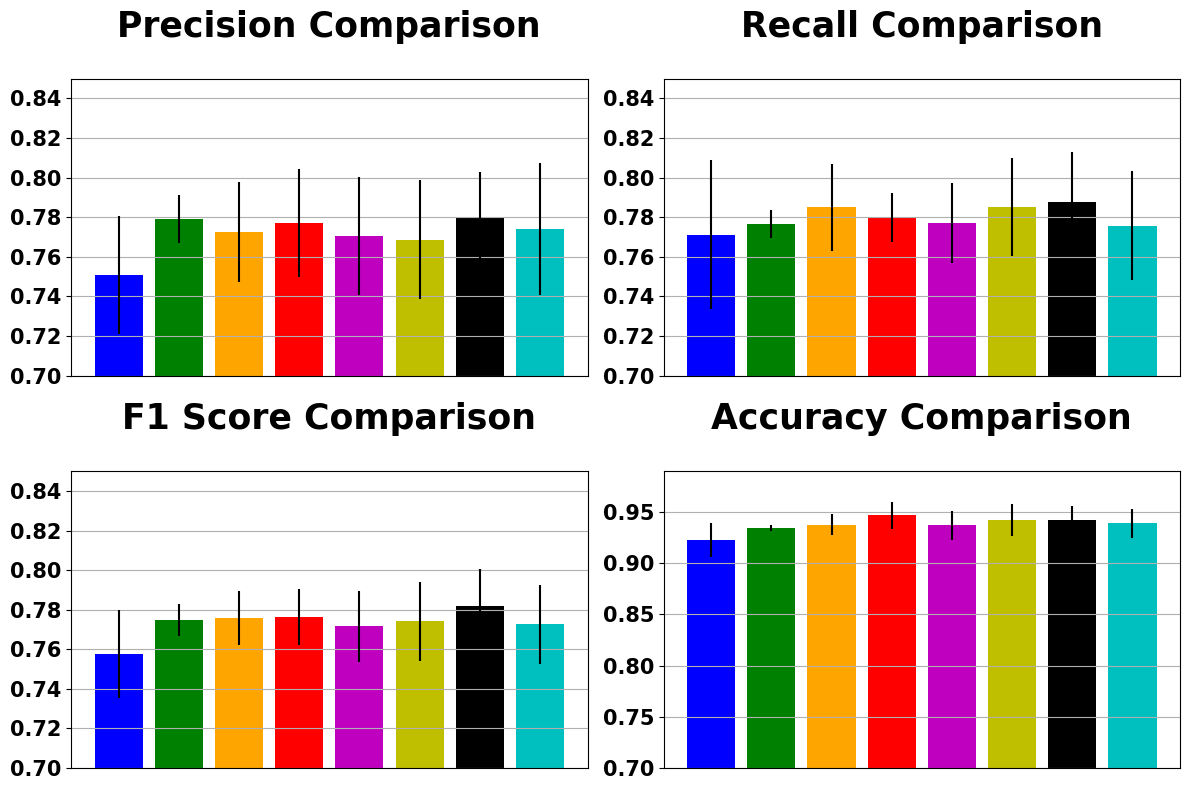

In [83]:
get_plot_total("Nanoparticle",[0.70]*4, [0.85]*3 + [0.99])

['bert-base-cased', 'bert-base-uncased', 'matbert-base-cased', 'matbert-base-uncased', 'MaterialsBERT', 'matscibert', 'scibert_scivocab_cased', 'scibert_scivocab_uncased']


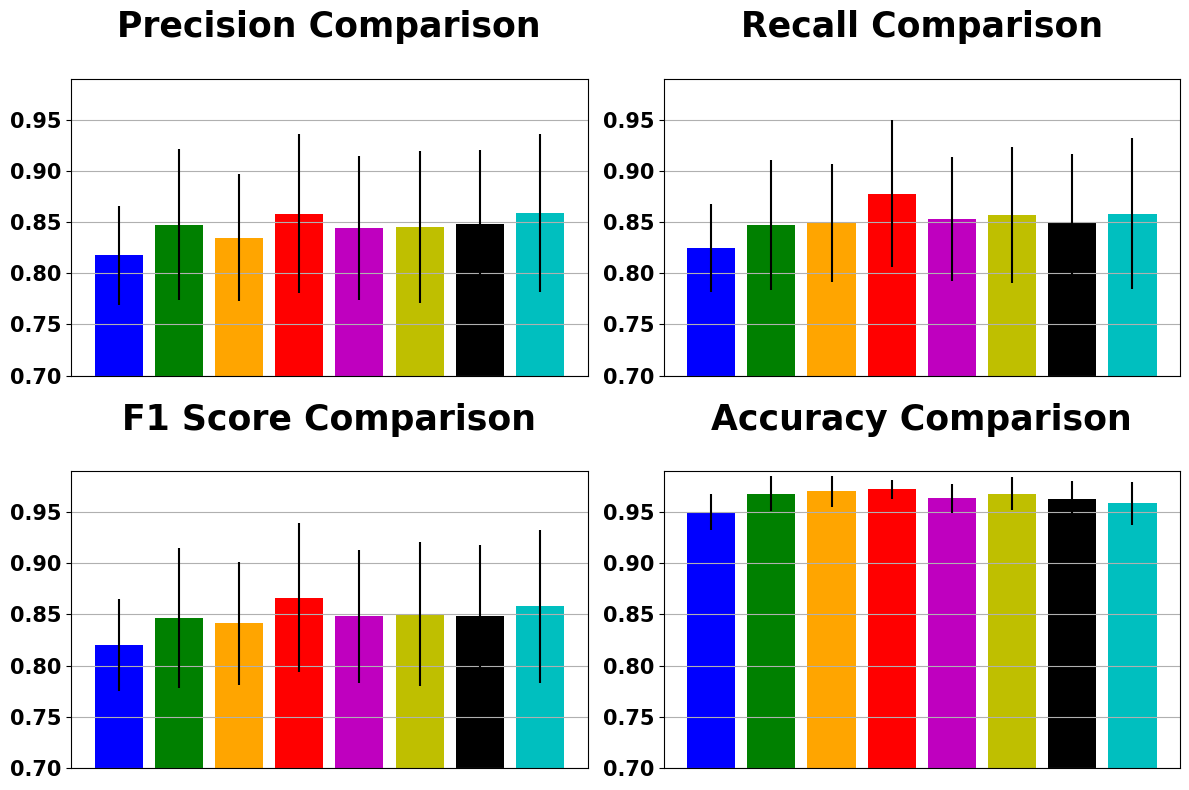

In [84]:
arr = np.array([[0.70, 0.99],[0.70, 0.99], [0.70, 0.99],[0.70, 0.99]])
get_plot_total("Main Subject",arr[:,0],arr[:,1])
# get_plot_total("Main Subject",None,arr[:,1])

['bert-base-cased', 'bert-base-uncased', 'matbert-base-cased', 'matbert-base-uncased', 'MaterialsBERT', 'matscibert', 'scibert_scivocab_cased', 'scibert_scivocab_uncased']


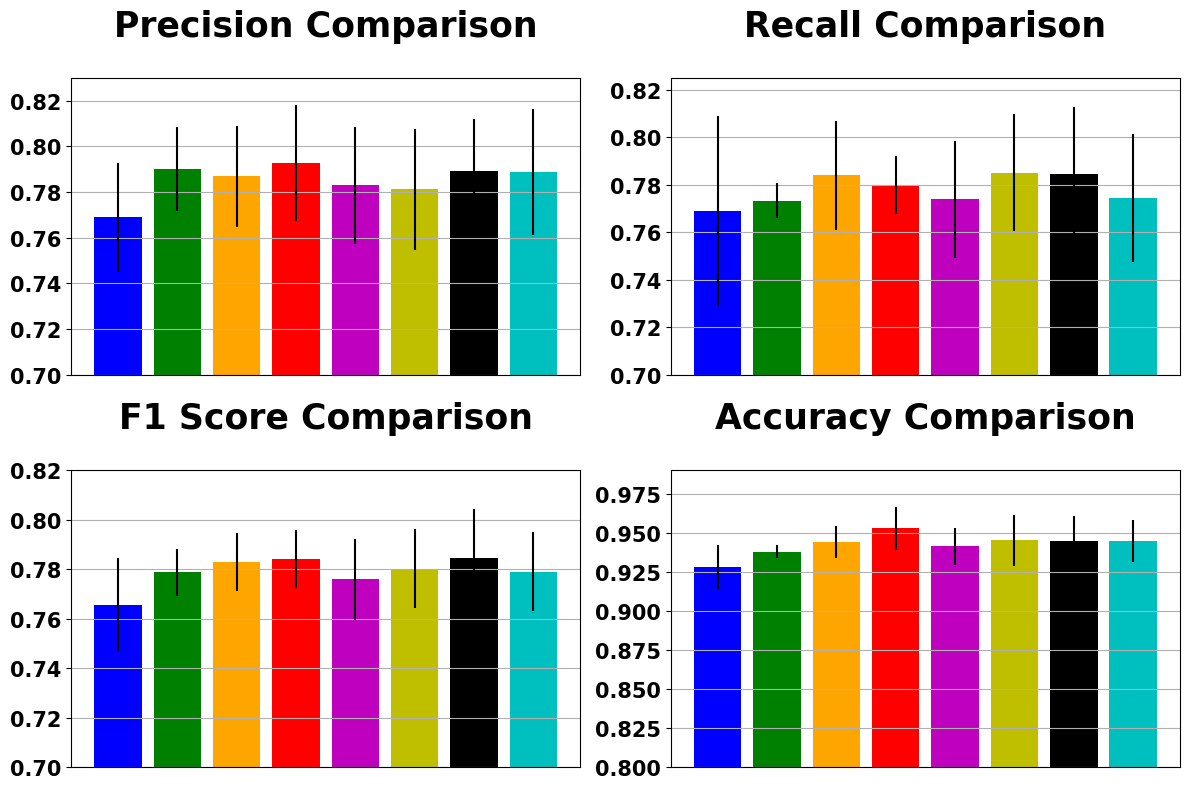

In [85]:
arr = np.array([[0.70, 0.83], [0.70, 0.825], [0.70, 0.82],[0.80,0.99]])
get_plot_total("Combined",arr[:,0],arr[:,1])

In [15]:
import os
import matplotlib.pyplot as plt

MODEL_NAME = "HYBRID"
hybrid_directory = "../../06-1processResults/best_tokenizer/test_results/Hybrid/"
datas = []
tokenizers = []

# 파일에서 데이터 읽기
for txt_name in os.listdir(hybrid_directory):
    with open(hybrid_directory + txt_name, "r") as f:
        txt = f.read()
        datas.append(txt)
tokenizers = [
    "matscibert",
    "MaterialsBERT",
    "bert-base-uncased",
    "scibert_uncased",
    "matbert-base-uncased",
    "bert-base-cased",
    "scibert_cased",
    "matbert-base-cased"
]
# Metric lists
Precision_list = []
Recall_list = []
F1_list = []
Accuracy_list = []

# 데이터 파싱
for data in datas:
    data = data.split("\n")[:4]
    Precision = float(data[0][data[0].find(": ") + 2:].strip())
    Recall = float(data[1][data[1].find(": ") + 2:].strip())
    F1 = float(data[2][data[2].find(": ") + 2:].strip())
    Accuracy = float(data[3][data[3].find(": ") + 2:].strip())


    Precision_list.append(Precision)
    Recall_list.append(Recall)
    F1_list.append(F1)
    Accuracy_list.append(Accuracy)

# Plot directory
plot_directory = 'plots'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Metrics bar plot
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
lists = [Precision_list, Recall_list, F1_list, Accuracy_list]

colors = ['b', 'g', 'orange', 'r', 'm', 'y', 'k', 'c']

# Create individual plots for each metric

for i, (metric, values) in enumerate(zip(metrics, lists)):
    plt.figure(figsize=(12, 8))
    plt.bar(tokenizers, values, color=colors[:len(tokenizers)])
    plt.title(f'{metric} Comparison Across Tokenizers', fontsize=25)
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right', fontsize=15)
    # for j, val in enumerate(values):
    #     plt.text(j, val + 0.01, f'{val:.2f}', ha='center', va='bottom')
    # plt.ylabel(metric)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(os.path.join(plot_directory, MODEL_NAME + f'_{metric}_comparison.png'))
    plt.close()


FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '../../06-1processResults/best_tokenizer/test_results/Hybrid/'